In [8]:
import tensorflow as tf
import cv2
import numpy as np

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

base_model = tf.keras.applications.ResNet50(weights=None, input_shape=(32,32,3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(100, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

y_train = tf.squeeze(tf.one_hot(y_train, 100), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 100), axis=1)


In [11]:
history = model.fit(x=x_train, y=y_train, batch_size=20, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
2000/2000 [==============================] - 70s 35ms/step - loss: 4.6536 - acc: 0.0424 - val_loss: 4.3612 - val_acc: 0.0804
Epoch 2/20
2000/2000 [==============================] - 69s 34ms/step - loss: 3.9982 - acc: 0.0992 - val_loss: 4.4220 - val_acc: 0.1120
Epoch 3/20
2000/2000 [==============================] - 69s 34ms/step - loss: 3.7153 - acc: 0.1412 - val_loss: 3.7412 - val_acc: 0.1684
Epoch 4/20
2000/2000 [==============================] - 69s 34ms/step - loss: 3.4865 - acc: 0.1812 - val_loss: 4.3935 - val_acc: 0.1843
Epoch 5/20
2000/2000 [==============================] - 68s 34ms/step - loss: 3.2644 - acc: 0.2168 - val_loss: 5.1616 - val_acc: 0.1724
Epoch 6/20
2000/2000 [==============================] - 68s 34ms/step - loss: 3.0577 - acc: 0.2554 - val_loss: 3.1869 - val_acc: 0.2344
Epoch 7/20
2000/2000 [==============================] - 68s 34ms/step - loss: 2.9144 - acc: 0.2839 - val_loss: 3.4004 - val_acc: 0.2792
Epoch 8/20
2000/2000 [==========================

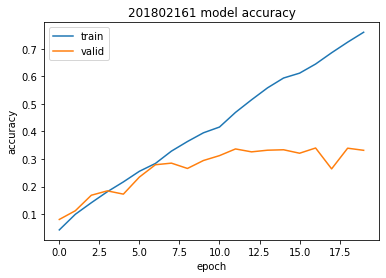

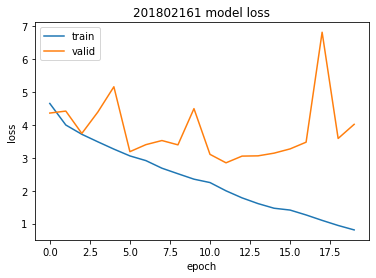

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('201802161 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('201802161 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [16]:
print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

validation accuracy
0.33160001039505005
0.3400000035762787


In [17]:
results = model.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])

313/313 [==============================] - 3s 10ms/step - loss: 3.9867 - acc: 0.3465
test accuracy
0.3465000092983246
